## Imports

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import os
import glob

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Info

A set of spike-in samples consisting of HT29 genomic DNA spiked at various percentages into mixed DNA from several healthy plasma samples were processed using the PanSeer assay.

In [3]:
HT29_0percent = ['HT29_0percent_1', 'HT29_0percent_2', 'HT29_0percent_3', 'HT29_0percent_4', 'HT29_0percent_5', 'HT29_0percent_6']
HT29_0p1percent = ['HT29_0p1percent_1', 'HT29_0p1percent_2', 'HT29_0p1percent_3', 'HT29_0p1percent_4', 'HT29_0p1percent_5', 'HT29_0p1percent_6']
HT29_0p5percent = ['HT29_0p5percent_1', 'HT29_0p5percent_2', 'HT29_0p5percent_3', 'HT29_0p5percent_4', 'HT29_0p5percent_5', 'HT29_0p5percent_6']
HT29_1percent = ['HT29_1percent_1', 'HT29_1percent_2', 'HT29_1percent_3', 'HT29_1percent_4', 'HT29_1percent_5', 'HT29_1percent_6']
HT29_5percent = ['HT29_5percent_1', 'HT29_5percent_2', 'HT29_5percent_3', 'HT29_5percent_4', 'HT29_5percent_5', 'HT29_5percent_6']
HT29_10percent = ['HT29_10percent_1', 'HT29_10percent_2', 'HT29_10percent_3', 'HT29_10percent_4', 'HT29_10percent_5', 'HT29_10percent_6']
HT29_100percent = ['HT29_100percent_1', 'HT29_100percent_2', 'HT29_100percent_3', 'HT29_100percent_4', 'HT29_100percent_5']

## Load Data

Let's load a data matrix listing the methylation level across each CpG site for each sample.

In [6]:
amf_df = pd.read_csv('DataS2.tsv', sep="\t", header=0, index_col=0)

## Cutoff Selection

Let's use three healthy plasma samples to identify the background level of methylation for each CpG site.

In [9]:
training_samples = [HT29_0percent[1], HT29_0percent[3], HT29_0percent[5]]
cutoffs = amf_df[training_samples].mean(axis=1) + amf_df[training_samples].std(axis=1)*3

Let's also identify CpG sites that have high methylation in the tissue samples.

In [11]:
high_in_tissue = amf_df[amf_df[HT29_100percent].mean(axis=1) > 0.6].index

## CpG Site Counting

Let's count the number of CpG sites that are above the cutoff in each sample.

In [29]:
cpg_count_df = {}
for x in [HT29_0percent[0], HT29_0percent[2], HT29_0percent[4]]:
    cpg_count_df[x] = [0, sum(amf_df.loc[high_in_tissue, x] > cutoffs.loc[high_in_tissue])]
for x in HT29_0p1percent:
    cpg_count_df[x] = [0.1, sum(amf_df.loc[high_in_tissue, x] > cutoffs.loc[high_in_tissue])]
for x in HT29_0p5percent:
    cpg_count_df[x] = [0.5, sum(amf_df.loc[high_in_tissue, x] > cutoffs.loc[high_in_tissue])]
for x in HT29_1percent:
    cpg_count_df[x] = [1, sum(amf_df.loc[high_in_tissue, x] > cutoffs.loc[high_in_tissue])]
for x in HT29_5percent:
    cpg_count_df[x] = [5, sum(amf_df.loc[high_in_tissue, x] > cutoffs.loc[high_in_tissue])]
for x in HT29_10percent:
    cpg_count_df[x] = [10, sum(amf_df.loc[high_in_tissue, x] > cutoffs.loc[high_in_tissue])]
    
cpg_count_df = pd.DataFrame(cpg_count_df).T
cpg_count_df.columns = ['Spike-In %', 'Number of CpG Sites']
cpg_count_df = cpg_count_df.sort_values('Spike-In %')

## Plot Spike-In Counts

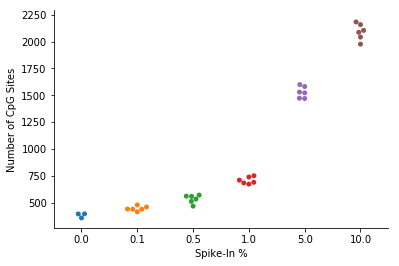

In [31]:
sns.swarmplot(x='Spike-In %', y='Number of CpG Sites', data=cpg_count_df)
sns.despine()

All spike-in samples could be detected.